# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [22]:
demo_tratado = pd.read_csv('demo_tratado.csv')
demo_tratado.head()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,1,1,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,1,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,2,0,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
3,3,1,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,4,1,0,1,0,27.482192,4.024658,1,0,1,...,1,1,0,0,0,1,0,0,0,0


In [23]:
y = demo_tratado.mau
X = demo_tratado.drop('mau', axis=1)
X.head(20)

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,1,1,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,1,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,2,0,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
3,3,1,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,4,1,0,1,0,27.482192,4.024658,1,0,1,...,1,1,0,0,0,1,0,0,0,0
5,5,1,0,1,1,30.049315,4.438356,1,0,0,...,1,0,0,1,0,1,0,0,0,0
6,6,0,1,1,3,34.764384,3.186301,1,0,0,...,1,1,0,0,0,1,0,0,0,0
7,7,0,0,1,1,32.443836,5.523288,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8,8,0,1,1,0,56.169863,12.191781,1,0,1,...,1,1,0,0,0,1,0,0,0,0
9,9,1,1,1,2,43.180822,8.693151,1,0,0,...,1,1,0,0,0,1,0,0,0,0


In [24]:
X = X.drop('Unnamed: 0', axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [33]:
clf = DecisionTreeClassifier(random_state = 100)
clf = clf.fit(X_train,y_train)

In [34]:
predict = clf.predict(X_train)

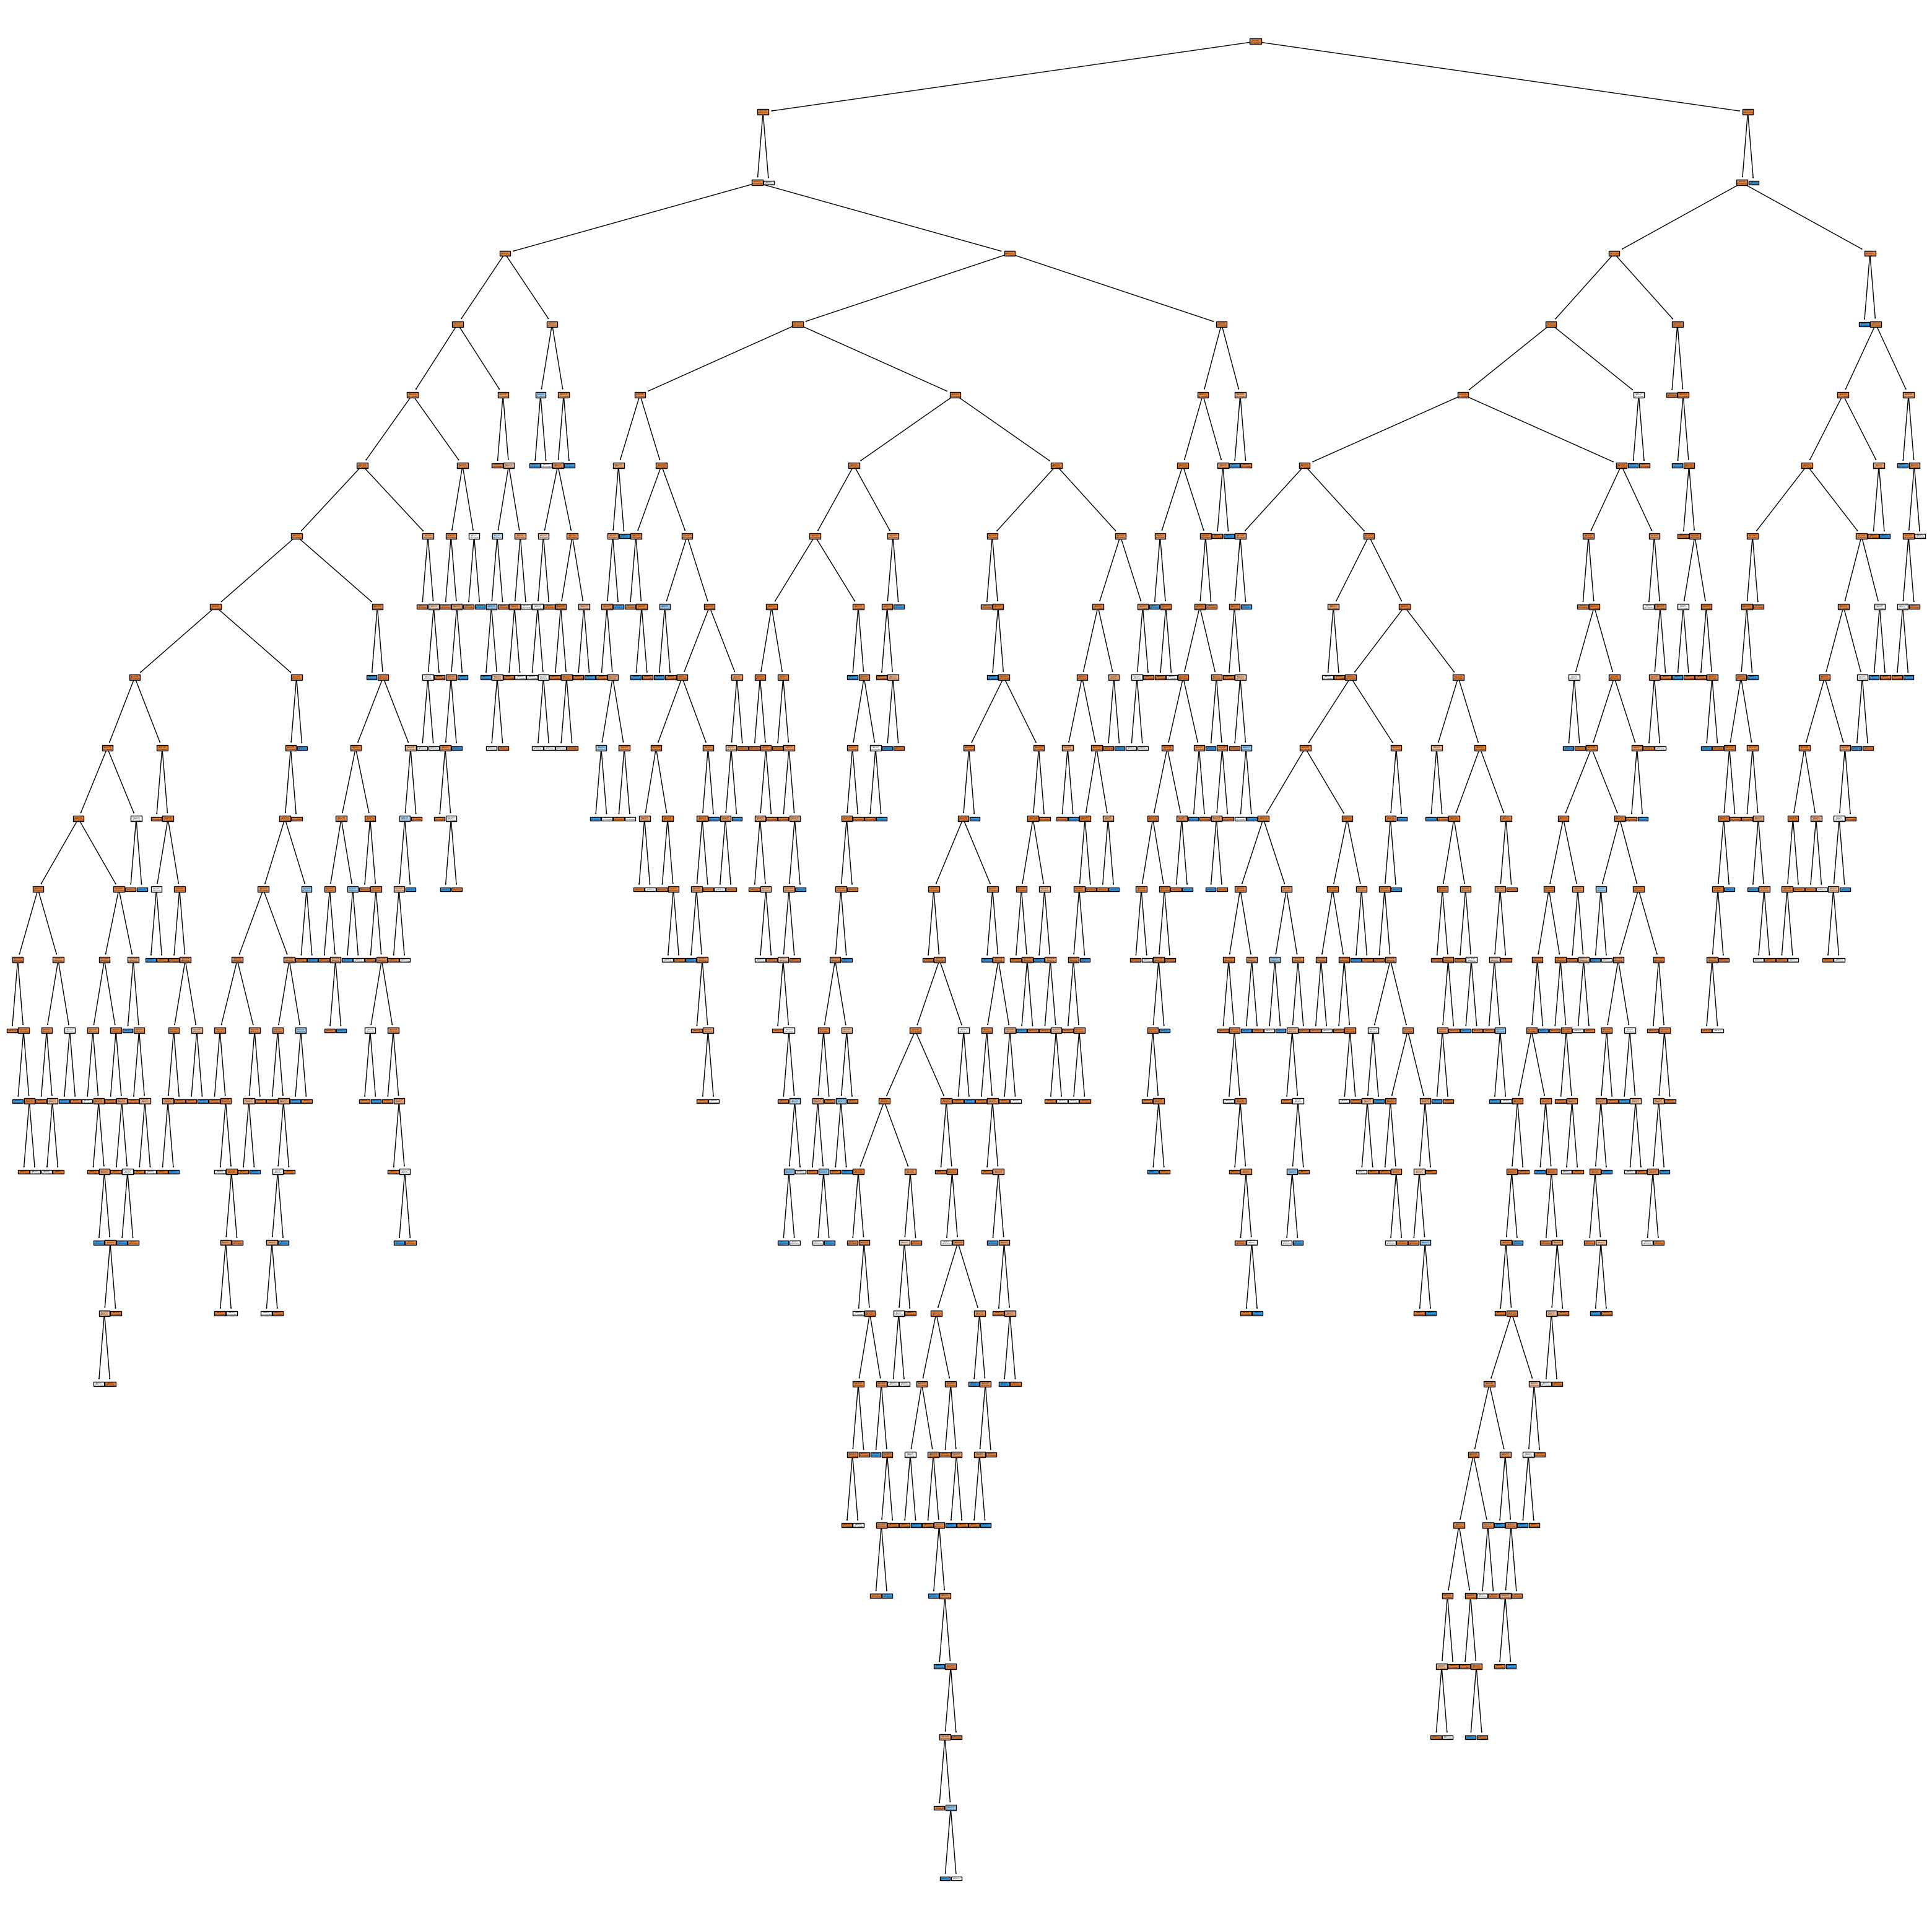

In [35]:
plt.figure(figsize=(40,40))
plot_tree(clf,
         filled = True,
         class_names=['reprovados','aprovados'],
         feature_names=None);

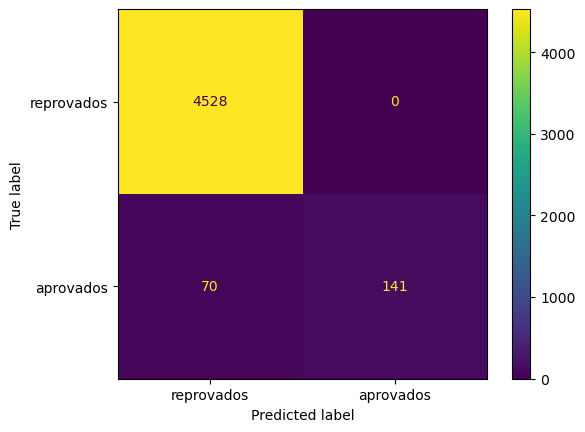

In [36]:
ConfusionMatrixDisplay.from_estimator(clf, X_train,y_train, display_labels=['reprovados','aprovados']);
plt.show()

In [37]:
accuracy_score(y_train, predict)

0.9852289512555391

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [38]:
clf = DecisionTreeClassifier(random_state = 100)
clf = clf.fit(X_test,y_test)

In [39]:
predict = clf.predict(X_test)

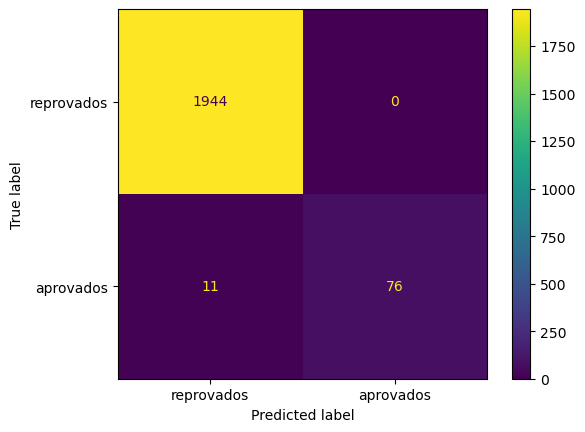

In [40]:
ConfusionMatrixDisplay.from_estimator(clf, X_test,y_test, display_labels=['reprovados','aprovados']);
plt.show()

In [41]:
accuracy_score(y_test, predict)

0.9945839487936977

**Resposta - Item 3:** Nos dois casos, treino: 98,5% e teste: 99,4, o valor é muito alto, bem próximo de 100%.

In [42]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5,random_state=123)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.9565309136948723

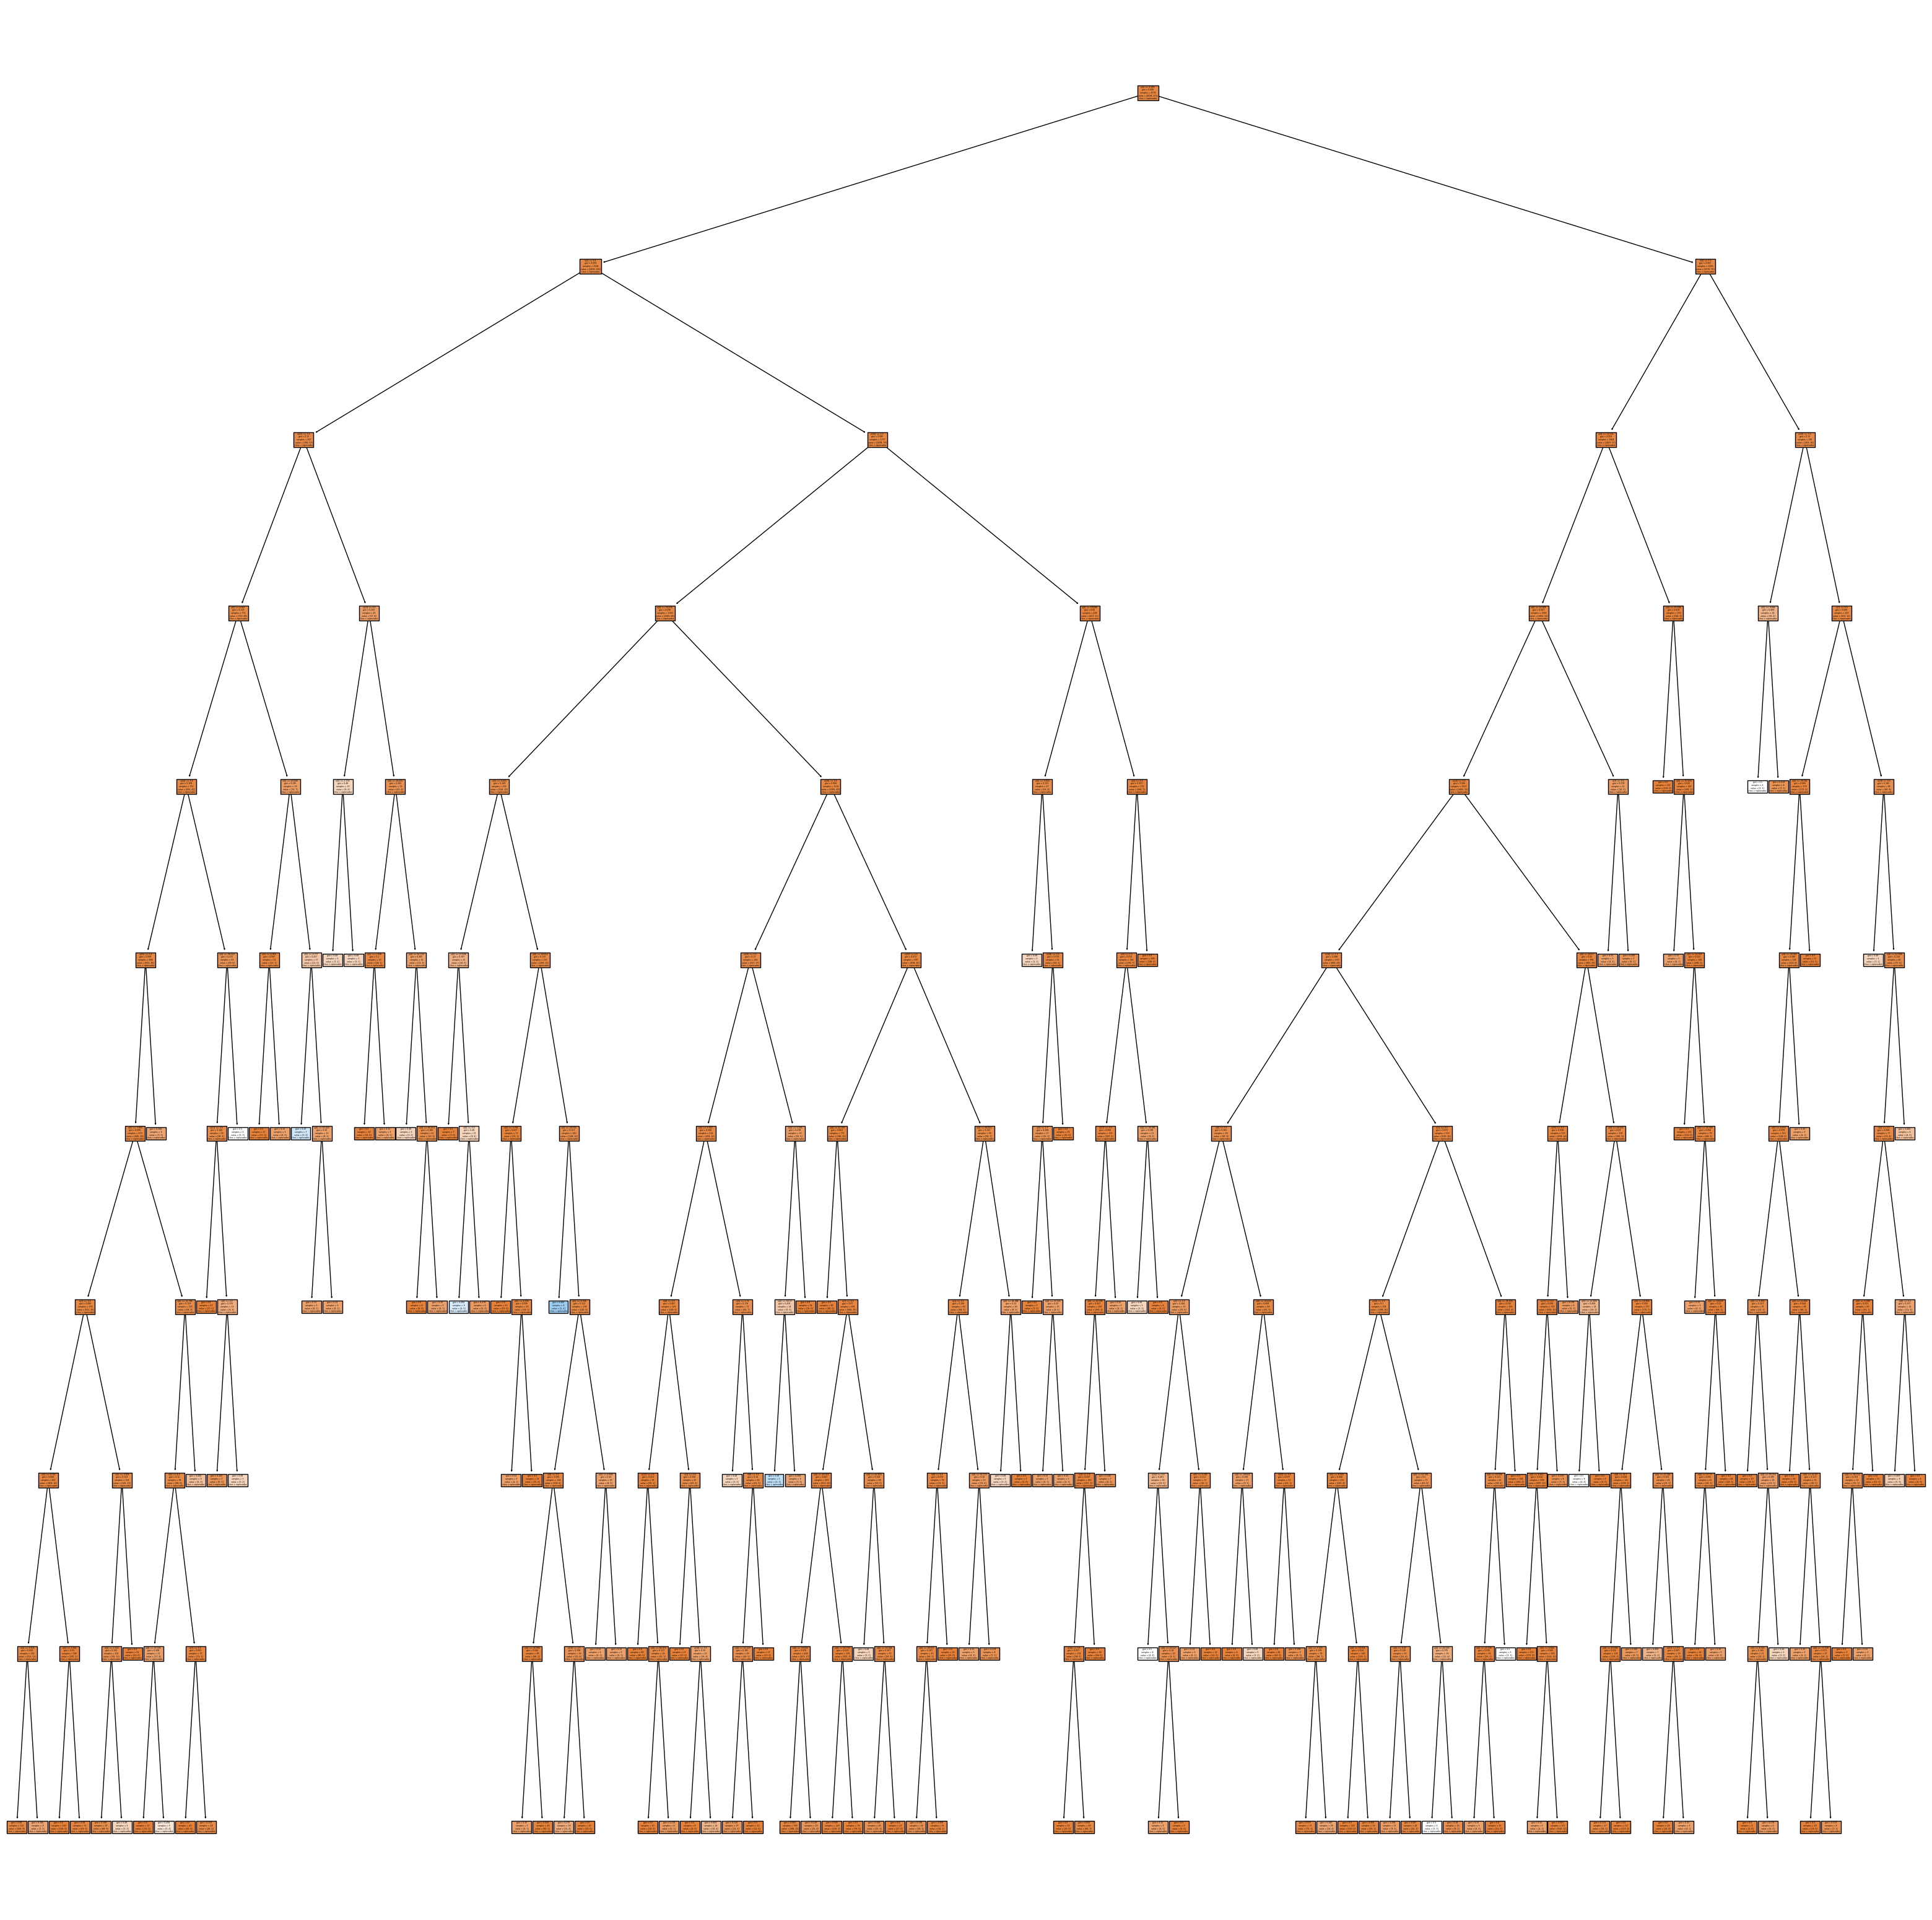

In [43]:
plt.figure(figsize=(40,40))
plot_tree(clf,
         filled = True,
         class_names=['reprovados','aprovados'],
         feature_names=None);

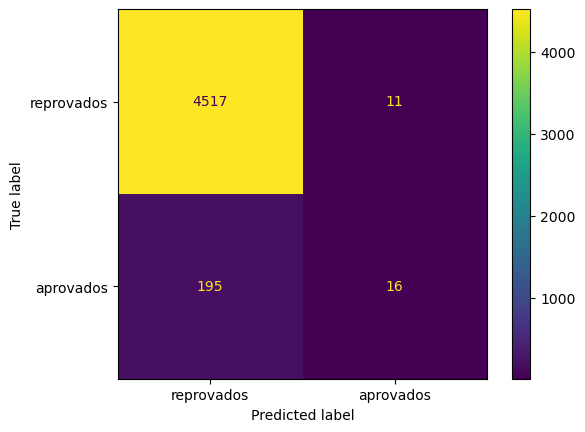

In [44]:
ConfusionMatrixDisplay.from_estimator(clf, X_train,y_train, display_labels=['reprovados','aprovados']);
plt.show()

**Resposta - Item 4:** Dos 4.739 contratos, 4712 foram classificados como 'maus', o que representa um percentual de 99,4%.

**Resposta - Item 5:** Nesse caso a acurácia seria de somente 0,35%, visto que somente 16 contratos permaneceriam na linha diagonal composta pelos quadrante predicted label aprovados + true label reprovados.
    